# Домашнее задание. Pandas

In [1]:
import pandas as pd
df = pd.read_csv('TSLA.csv');

1. Вывести все колонки из DataFrame

In [2]:
#print( df )
#df.head()
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

2. Посчитать среднюю цену закрытия акций Tesla, в периуд с открытия по 10.01.2012

In [3]:
import numpy as np
df[df['Date']<"20121001"]["Close"].mean()

27.81865506012658

3. Вывести график цены закрытия 

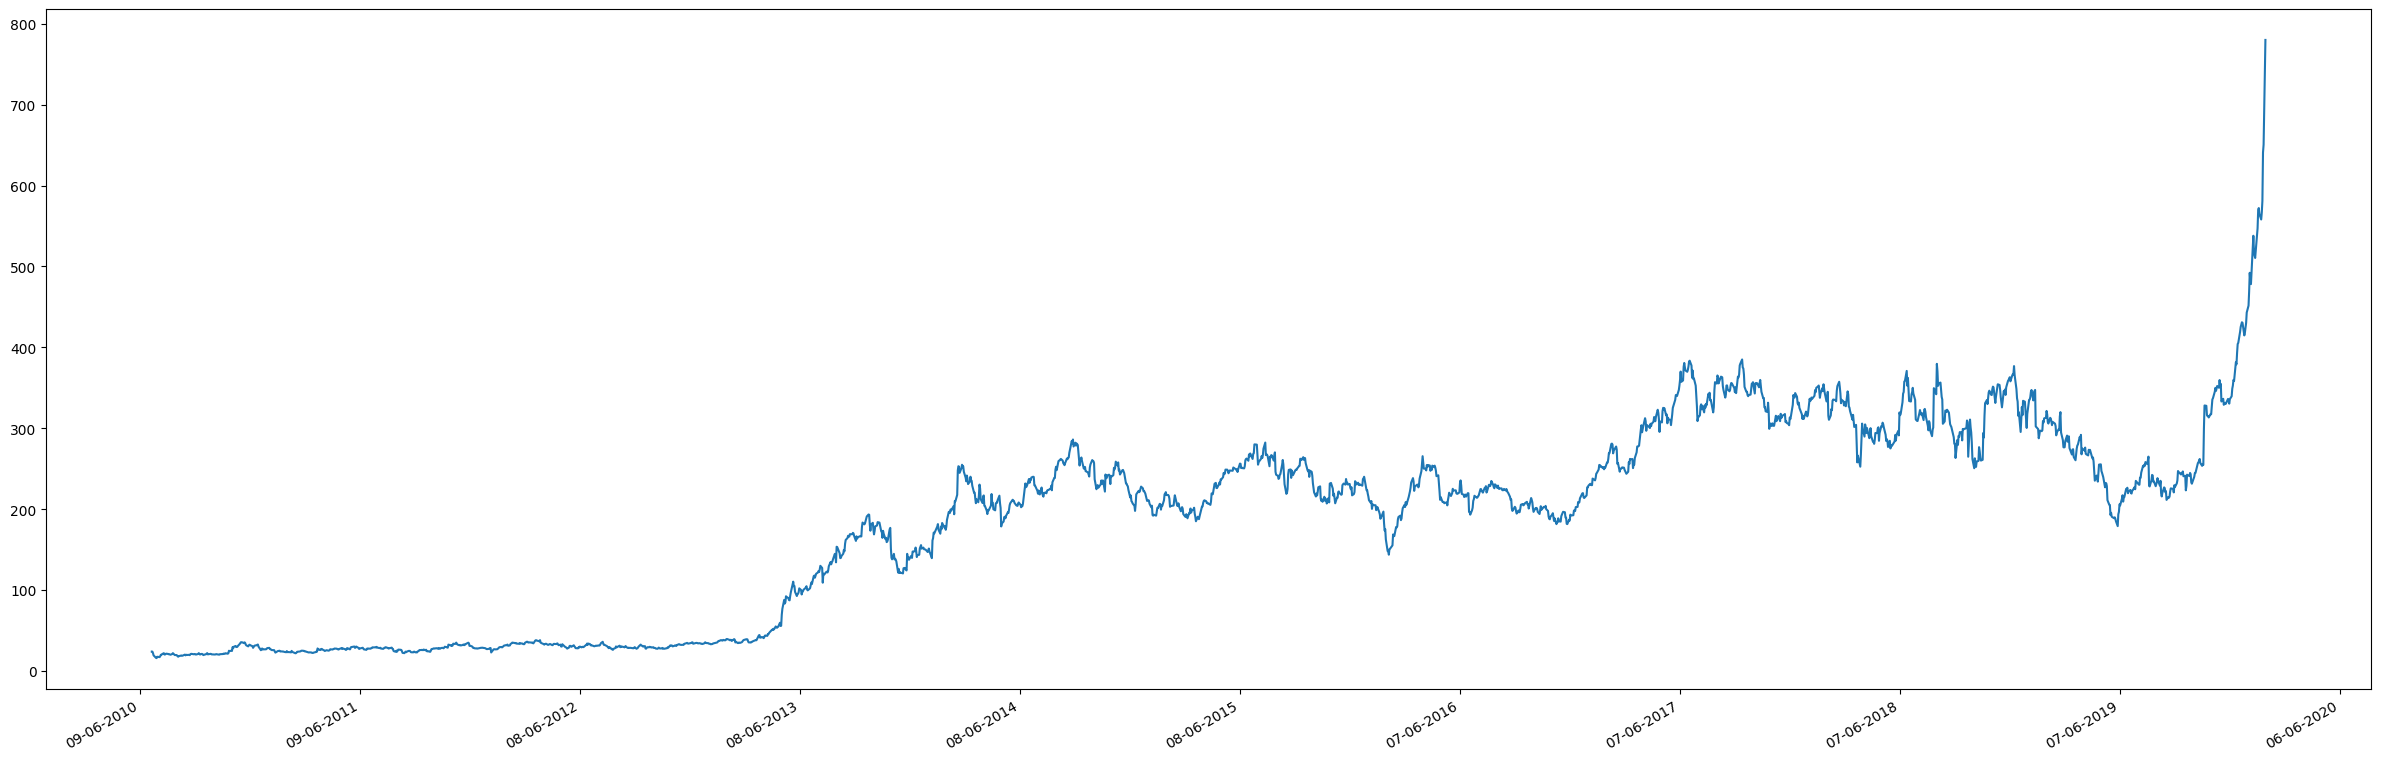

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

a,b = df.loc[:, ['Date', 'Close']].to_numpy().T
fig, ax = plt.subplots(figsize=(30, 10))#, layout='constrained')
conv_a = np.array(a, dtype='datetime64')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.plot(conv_a,b)
plt.gcf().autofmt_xdate()
plt.show()

#df.astype({'Date':'datetime64'}).plot(x = "Date", y = "Close", kind = 'bar', rot = 'vertical', figsize=(100,10), xticks = [] )


4. Нормализация 

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [5]:
#df.loc[:,'Open']
max_el = df["Open"].max()
min_el = df["Open"].min()
df["Open"].apply(lambda x: (x - min_el)/(max_el - min_el))

0       0.004349
1       0.014676
2       0.013474
3       0.010433
4       0.005870
          ...   
2411    0.840012
2412    0.850962
2413    0.937237
2414    0.948764
2415    1.000000
Name: Open, Length: 2416, dtype: float64

5. Что такое SMA (Simple Moving Average) с окном 12,15,30. 
Можно посмотреть внешние решения: 
- https://www.pythonpool.com/moving-average-python/   
- https://mrjbq7.github.io/ta-lib/

<AxesSubplot: >

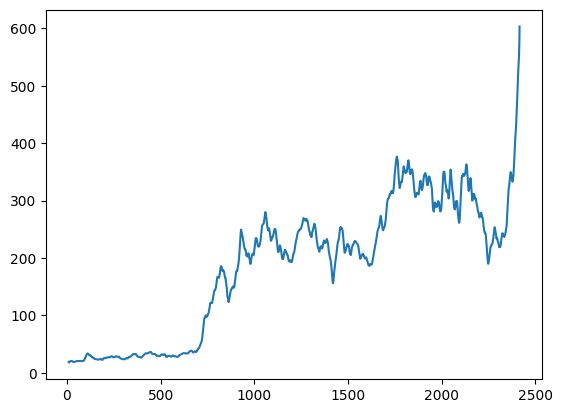

In [26]:
'''
Simple Moving Average is the most common type of average used.
In SMA, we perform a summation of recent data points and divide
them by the time period. The higher the value of the sliding width,
the more the data smoothens out, but a tremendous value might lead to
a decrease in inaccuracy. To calculate SMA, we use pandas.Series.rolling() method.
'''

df["Close"].rolling(10).mean().plot()
#plt.locator_params(axis='x', nbins=15)
#plt.locator_params(axis='x', nbins=100)
#mdates.YearLocator()
#xticks=([5],[df.astype({"Date":'datetime64'})['Date'][5]]), figsize=(100,10))
#[df["Date"][i] for i in range( len(df["Date"])//365 ) ])

6. Построить график с ценой закрытия и посчитаным SMA 12,15,30

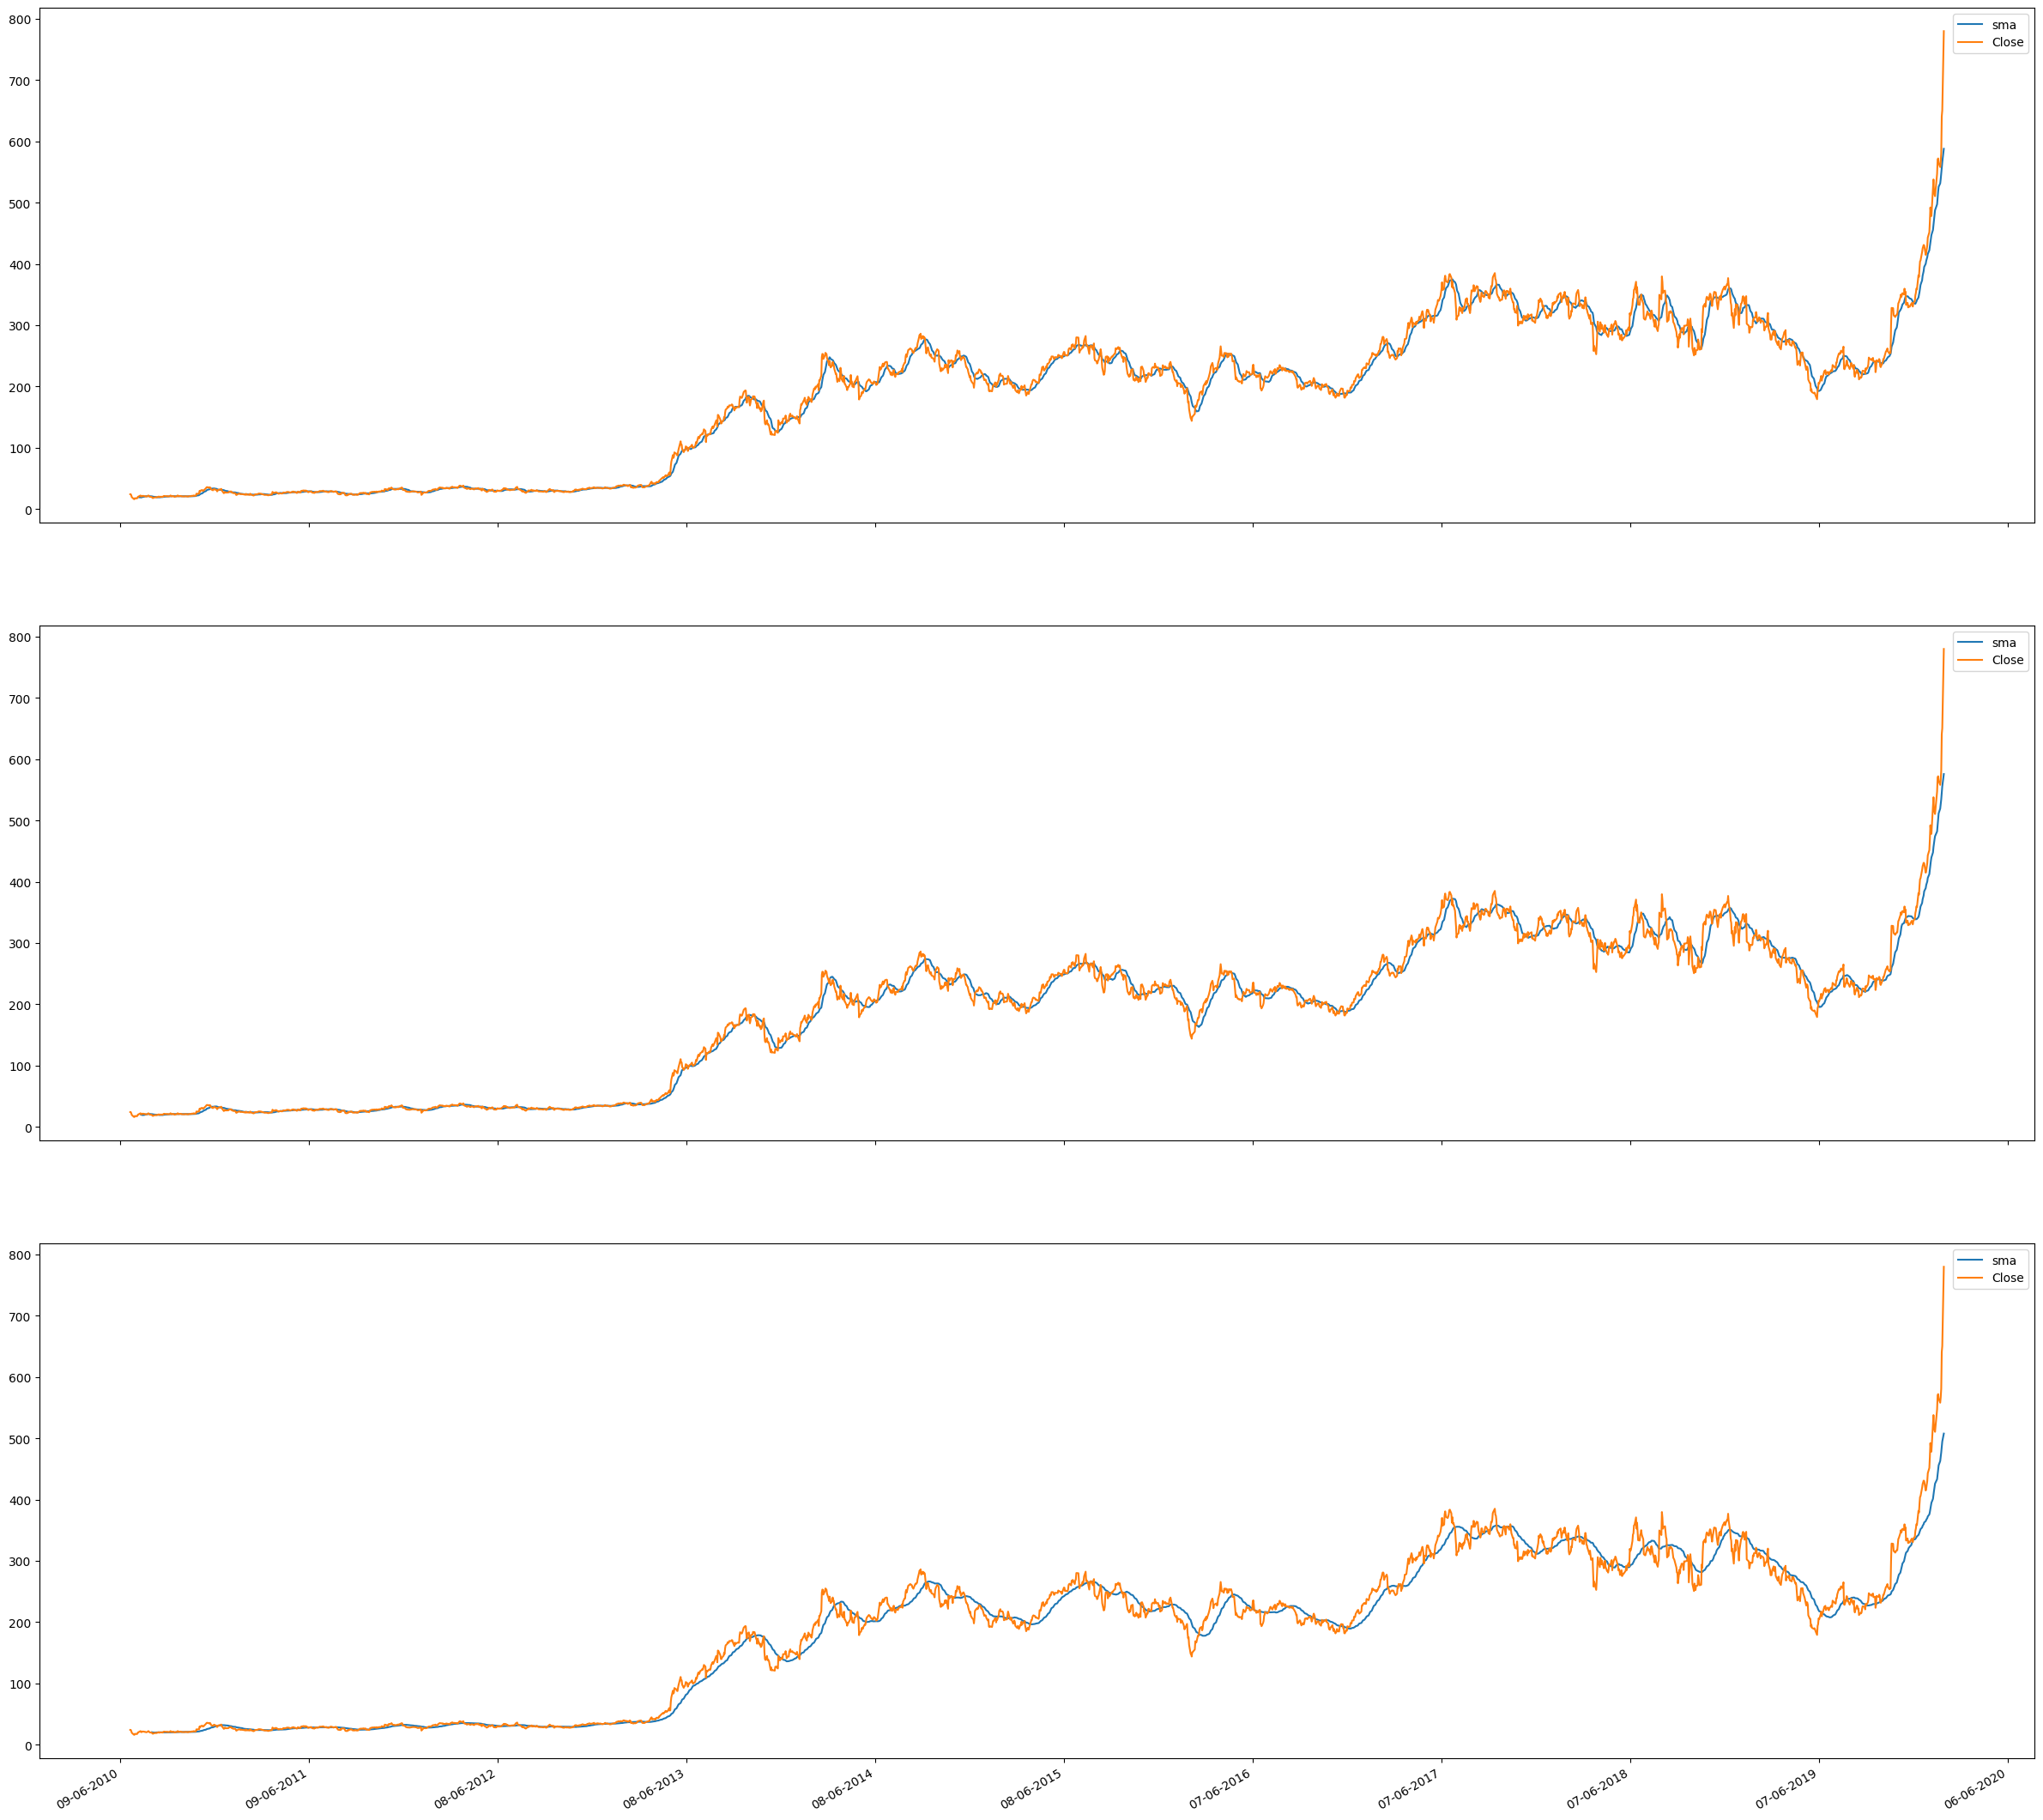

In [25]:
a,b = df.loc[:, ['Date', 'Close']].to_numpy().T
conv_a = np.array(a, dtype='datetime64')
win = [12,15,30]

fig = plt.figure(figsize=(30,30))
for i in range(len(win)):
    plt.subplot(3,1,i+1)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
    plt.plot(conv_a, df['Close'].rolling(window = win[i]).mean(), label='sma')
    plt.plot(conv_a,b, label='Close')
    plt.legend()
    plt.gcf().autofmt_xdate()

#plt.subplot(4,1,4)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
#plt.plot(conv_a,df['Close'].rolling(window = 12).mean())
#plt.plot(conv_a,b)
#plt.gcf().autofmt_xdate()


#ax[0].plot(conv_a,df['Close'].rolling(window = 12).mean())
#axarr[0].plot('Date', 'Close', data=df)#, #figsize=(20,5), legend=True)
#df['Close'].plot(figsize=(20,5), legend=True)
#df['Close'].rolling(window = 12).mean().plot(legend=True, label='sma12')
#df['Close'].rolling(window = 15).mean().plot(legend=True, label='sma15')
#df['Close'].rolling(window = 30).mean().plot(legend=True, label='sma30')
plt.show()

7. Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?

Когда SMA возрастает - нужно покупать, когда убывает - продавать